# QF 625 Introduction to Programming
## Lesson 05-06 | Analyzing Historical Stock and Index Data (Featuring plotly) | `RE`view

> This week's lesson begins with the `analysis of historical stock and index data`, followed by `the class on web scraping tomorrow`.

> To accomplish this, you will integrate what you have learned about `numpy`, `matplotlib`, and `pandas` modules. 

> As usual, there will be additional modules to be shared: namely, `pandas_datareader` (for extracting historical stock data) and `plotly` (for interactive visualization of financial data analysis).

> Let's have yet another informative learning week, Team :)

### Activation of necessary modules.

In [1]:
import pandas as pd
import pandas_datareader.data as web

import datetime

import numpy as np
import matplotlib.pyplot as plt

> Let's make all our graphics inline.

In [2]:
%matplotlib inline

> Let's set some pandas options upfront so that you can explore your data more efficiently.

In [3]:
pd.set_option("max_rows", 10)
pd.set_option("min_rows", 8)

> Once the display.max_rows() is exceeded, the display.min_rows() options determines how many rows are shown in the truncated representation.

In [4]:
pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", 12)
pd.set_option("display.width", 80)
pd.set_option("precision", 3)

### Obtaining historical stock and index data

#### Fetching stock data from `Yahoo!  Finance`

> Let's request the previous three years (2017 September through yesterday) of data for TSLA.

In [5]:
start = datetime.date(2017, 9, 1)
end = datetime.date(2020, 8, 30)

> Let's extract stock data for TSLA.

> `DataReader()` extracts the stock prices for the S&P 500 for the dates we selected from Yahoo Finance.

In [6]:
tesla = web.DataReader("TSLA", "yahoo", start, end)
tesla.head()

              High     Low    Open   Close    Volume  Adj Close
Date                                                           
2017-08-31  71.688  70.564  70.710  71.180  20364000     71.180
2017-09-01  71.518  70.738  71.224  71.080  15247500     71.080
2017-09-05  71.098  69.178  70.760  69.918  19175500     69.918
2017-09-06  70.196  68.312  69.900  68.906  20457000     68.906
2017-09-07  70.496  68.690  69.196  70.122  21196000     70.122

> Let's retrieves the historical prices for a list of stocks

In [7]:
def get(tickers, start, end):
    
    def data(ticker):
        return web.DataReader(ticker, "yahoo", start, end)
    
    stocks = map(data, tickers)
    
    return pd.concat(stocks, keys = tickers, names = ["Ticker", "Date"])

> Let's get data for stocks of following companies:

- Apple
- Microsoft
- Netflix
- Facebook
- Boeing
- United Airlines
- Goldman Sachs
- JP Morgan Chase


In [8]:
tickers = ["AAPL", "MSFT", "NFLX", "FB", "BA", "UAL", "GS", "JPM"]

In [9]:
stock8 = get(tickers, start, end)
stock8

                      High      Low     Open    Close     Volume  Adj Close
Ticker Date                                                                
AAPL   2017-08-31   41.130   40.870   40.910   41.000  1.071e+08     39.381
       2017-09-01   41.235   40.908   41.200   41.013  6.636e+07     39.393
       2017-09-05   41.062   40.140   40.938   40.520  1.179e+08     38.920
       2017-09-06   40.748   40.130   40.678   40.478  8.661e+07     38.880
...                    ...      ...      ...      ...        ...        ...
JPM    2020-08-25  101.980   99.800  101.270  100.500  1.365e+07    100.500
       2020-08-26  100.270   99.050   99.940   99.090  1.205e+07     99.090
       2020-08-27  102.650   99.000   99.000  102.350  2.216e+07    102.350
       2020-08-28  103.250  101.810  103.140  102.770  1.376e+07    102.770

[6032 rows x 6 columns]

#### Extracting Index data from Yahoo!

> Let's obtain daily `S&P500` information.

In [10]:
sp500_df = web.DataReader("SPY", "yahoo", start, end).reset_index()
sp500_df

          Date    High     Low    Open   Close     Volume  Adj Close
0   2017-08-31  247.77  246.05  246.72  247.49  1.038e+08    233.572
1   2017-09-01  248.33  247.67  247.92  247.84  6.201e+07    233.903
2   2017-09-05  247.52  244.95  247.26  246.06  9.140e+07    232.223
3   2017-09-06  247.28  246.23  246.84  246.90  5.792e+07    233.016
..         ...     ...     ...     ...     ...        ...        ...
750 2020-08-25  344.21  342.27  343.53  344.12  3.846e+07    344.120
751 2020-08-26  347.86  344.17  344.76  347.57  5.079e+07    347.570
752 2020-08-27  349.90  346.53  348.51  348.33  5.803e+07    348.330
753 2020-08-28  350.72  348.15  349.44  350.58  4.859e+07    350.580

[754 rows x 7 columns]

### Visualizing financial time-series data

#### Plotting closing prices

> Let's reset the index to make everything columns

In [11]:
just_closing_prices = stock8[["Adj Close"]].reset_index()
just_closing_prices.head()

  Ticker       Date  Adj Close
0   AAPL 2017-08-31     39.381
1   AAPL 2017-09-01     39.393
2   AAPL 2017-09-05     38.920
3   AAPL 2017-09-06     38.880
4   AAPL 2017-09-07     38.723

> Now let's `pivot` Date to the index, Ticker values to columns.

In [12]:
daily_close_px = just_closing_prices.pivot("Date", "Ticker", "Adj Close")
daily_close_px.head()

Ticker        AAPL       BA      FB       GS     JPM    MSFT    NFLX    UAL
Date                                                                       
2017-08-31  39.381  227.173  171.97  211.642  83.429  71.496  174.71  61.96
2017-09-01  39.393  227.808  172.02  213.666  84.172  70.702  174.74  62.43
2017-09-05  38.920  224.652  170.72  206.004  82.162  70.387  174.52  61.10
2017-09-06  38.880  222.396  172.09  206.998  82.713  70.186  179.25  60.33
2017-09-07  38.723  223.998  173.21  204.169  81.262  71.085  179.00  58.58

> Let's visualize one of the eight tickers.

<AxesSubplot:xlabel='Date'>

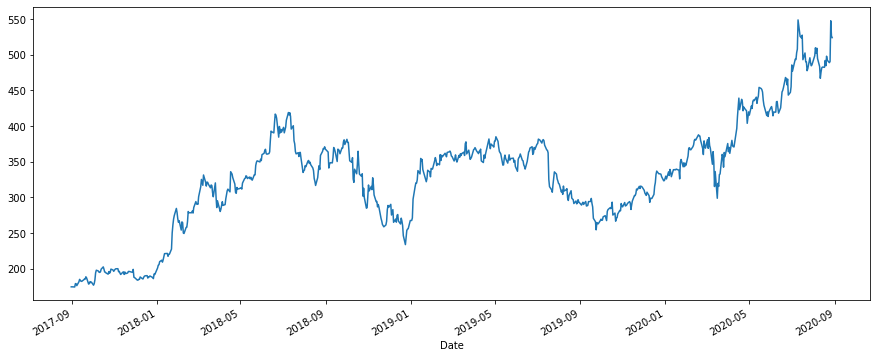

In [13]:
daily_close_px["NFLX"].plot(figsize = (15, 6))

> Let's visualize all the stock closing prices against each other.

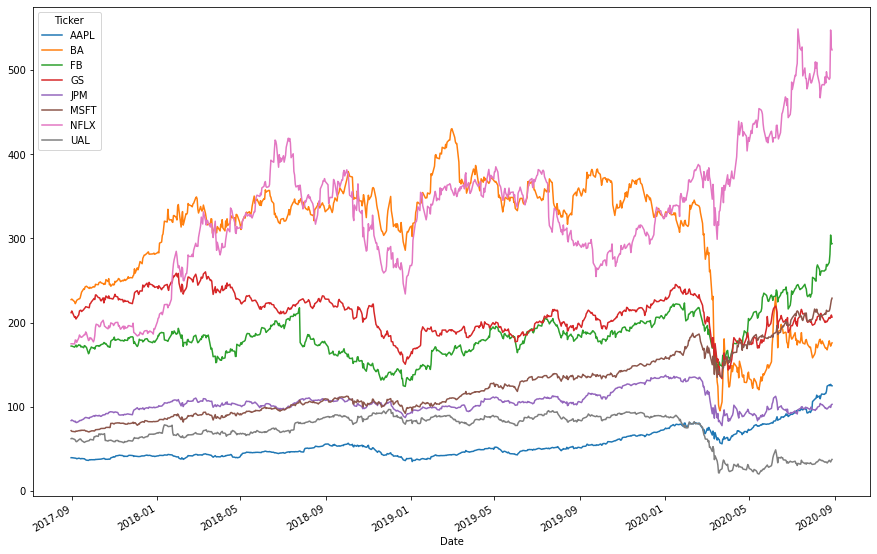

In [14]:
daily_close_px.plot(figsize = (15, 10))
plt.savefig("stocks.png", bbox_inches = "tight", dpi = 300)

## Plotting volumes series data

> Let's obtain the daily volumes for Facebook

In [15]:
fb_v = stock8.Volume.loc["FB"]

> Then, let's visualize it

<BarContainer object of 754 artists>

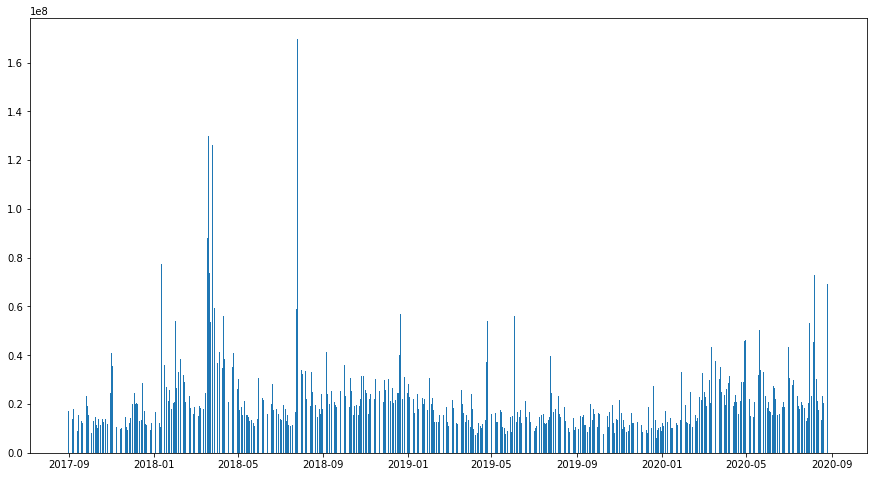

In [16]:
f, ax = plt.subplots(figsize = (15, 8))
plt.bar(fb_v.index, fb_v)

### Combined Price and Volumes

> TEAM, please find a way to present price and volumes together :)

### Visualizing `candlestick` chart

> A candlestick chart is a powerful chart in finance that shows the starting price, closing price, highest price and lowerst price of a trading day. 

> Let's create a candlestick chart of the stock prices for the S&P 500 over the past 3 years (between 2017 September and 2020 August). 

> You can find Candlestick in the `go` module.

In [17]:
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [18]:
sp500_df

          Date    High     Low    Open   Close     Volume  Adj Close
0   2017-08-31  247.77  246.05  246.72  247.49  1.038e+08    233.572
1   2017-09-01  248.33  247.67  247.92  247.84  6.201e+07    233.903
2   2017-09-05  247.52  244.95  247.26  246.06  9.140e+07    232.223
3   2017-09-06  247.28  246.23  246.84  246.90  5.792e+07    233.016
..         ...     ...     ...     ...     ...        ...        ...
750 2020-08-25  344.21  342.27  343.53  344.12  3.846e+07    344.120
751 2020-08-26  347.86  344.17  344.76  347.57  5.079e+07    347.570
752 2020-08-27  349.90  346.53  348.51  348.33  5.803e+07    348.330
753 2020-08-28  350.72  348.15  349.44  350.58  4.859e+07    350.580

[754 rows x 7 columns]

In [19]:
closing_overtime = go.Scatter(x = sp500_df.Date, y = sp500_df.Close)
go.Figure(closing_overtime)

In [20]:
candlestick = [go.Candlestick(x = sp500_df.Date,
                              open = sp500_df.Open,
                              high = sp500_df.High,
                              low = sp500_df.Low,
                              close = sp500_df.Close)]

# fig.update_layout(xaxis_rangeslider_visible = False)

go.Figure(candlestick)

In [21]:
netflix_df = stock8.loc["NFLX"].reset_index()
netflix_df

          Date    High     Low    Open   Close     Volume  Adj Close
0   2017-08-31  176.24  173.86  175.45  174.71  6.941e+06     174.71
1   2017-09-01  176.48  173.92  175.55  174.74  3.813e+06     174.74
2   2017-09-05  175.88  172.44  173.40  174.52  4.590e+06     174.52
3   2017-09-06  179.46  173.73  175.25  179.25  8.743e+06     179.25
..         ...     ...     ...     ...     ...        ...        ...
750 2020-08-25  492.47  485.09  488.19  490.58  5.728e+06     490.58
751 2020-08-26  549.04  492.08  492.50  547.53  2.037e+07     547.53
752 2020-08-27  541.00  521.25  537.78  526.27  9.063e+06     526.27
753 2020-08-28  539.00  522.00  532.00  523.89  4.418e+06     523.89

[754 rows x 7 columns]

In [22]:
comparison = [go.Scatter(x = sp500_df.Date, y = sp500_df.Close, name = "S&P 500"),
              go.Scatter(x = netflix_df.Date, y = netflix_df.Close, name = "Netflix")]

> Let's make an object that defines `buttons` (and what they do)

> This is where magic begins :)

In [23]:
updatemenus = list([
    dict(active = -1, # This will initialize with no buttons active
         buttons = list([ # "Buttons" is a list of dictionaries 
             dict(label = "sp500_df",
                  method = "update",
                  args = [{"visible": [True, False]},
                          {"title": "S&P 500"}]),
             dict(label = "netflix_df",
                  method = "update",
                  args = [{"visible": [False, True]},
                          {"title": "Netflix"}]),
             dict(label = "sp500_df + netflix_df",
                  method = "update",
                  args = [{"visible": [True, True]},
                          {"title": "S&P 500 versus Netflix"}])
         ]),
        )
])


layout = dict(title = "Yahoo! Finance", updatemenus = updatemenus) # This is where you include the "buttons."

figure = dict(data = comparison, layout = layout)

go.Figure(figure)

> One of the most important questions in data science practice (in finance) is `"compared with what"`?

> How would you visualize this again in a way that makes the returns of Netflix more easily comparable to the returns of the benchmark S&P 500?

In [24]:
better_comparison = [go.Scatter(x = sp500_df.Date, y = sp500_df.Close/sp500_df.iloc[0]["Close"], name = "S&P 500"),
                     go.Scatter(x = netflix_df.Date, y = netflix_df.Close/netflix_df.iloc[0]["Close"], name = "NFLX")]

In [25]:
layout2 = dict(title = "Yahoo! Finance", showlegend = True, updatemenus = updatemenus)

figure2 = dict(data = better_comparison, layout = layout2)
go.Figure(figure2)

### Some Fundamental Financial Calculations

#### `Daily percentage change`

> Let's calculate % change from day 0 to day 1

In [27]:
daily_close_px

Ticker         AAPL       BA      FB       GS      JPM     MSFT    NFLX    UAL
Date                                                                          
2017-08-31   39.381  227.173  171.97  211.642   83.429   71.496  174.71  61.96
2017-09-01   39.393  227.808  172.02  213.666   84.172   70.702  174.74  62.43
2017-09-05   38.920  224.652  170.72  206.004   82.162   70.387  174.52  61.10
2017-09-06   38.880  222.396  172.09  206.998   82.713   70.186  179.25  60.33
...             ...      ...     ...      ...      ...      ...     ...    ...
2020-08-25  124.825  174.730  280.82  204.760  100.500  216.470  490.58  35.22
2020-08-26  126.522  171.900  303.91  205.973   99.090  221.150  547.53  34.25
2020-08-27  125.010  174.200  293.22  208.885  102.350  226.580  526.27  36.22
2020-08-28  124.808  175.800  293.66  206.460  102.770  228.910  523.89  37.34

[754 rows x 8 columns]

In [26]:
apple_p_t0 = daily_close_px.iloc[0]["AAPL"] # Pt-1
apple_p_t1 = daily_close_px.iloc[1]["AAPL"] # Pt
r_t1 = apple_p_t1 / apple_p_t0 - 1 # returns
apple_p_t0, apple_p_t1, r_t1

(39.38139724731445, 39.393409729003906, 0.00030502934200171694)

> Surely, we can apply this to everything with the following using slices :)

In [29]:
dpc_1 = daily_close_px.iloc[1:] / daily_close_px.iloc[:-1].values - 1
dpc_1.loc[:,"AAPL":"UAL"]

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
2017-09-07 -4.015e-03  0.007  6.508e-03 -0.014 -0.018  0.013 -1.395e-03 -0.029
...               ...    ...        ...    ...    ...    ...        ...    ...
2020-08-25 -8.204e-03 -0.020  3.475e-02 -0.006  0.004  0.013  3.621e-03 -0.030
2020-08-26  1.360e-02 -0.016  8.222e-02  0.006 -0.014  0.022  1.161e-01 -0.028
2020-08-27 -1.195e-02  0.013 -3.517e-02  0.014  0.033  0.025 -3.883e-02  0.058
2020-08-28 -1.620e-03  0.009  1.501e-03 -0.012  0.004  0.010 -4.522e-03  0.031

[753 rows x 8 columns]

> Let's show the DataFrame that is the numerator

In [30]:
price_matrix_minus_day1 = daily_close_px.iloc[1:]
price_matrix_minus_day1.head()

Ticker        AAPL       BA      FB       GS     JPM    MSFT    NFLX    UAL
Date                                                                       
2017-09-01  39.393  227.808  172.02  213.666  84.172  70.702  174.74  62.43
2017-09-05  38.920  224.652  170.72  206.004  82.162  70.387  174.52  61.10
2017-09-06  38.880  222.396  172.09  206.998  82.713  70.186  179.25  60.33
2017-09-07  38.723  223.998  173.21  204.169  81.262  71.085  179.00  58.58
2017-09-08  38.092  226.339  170.95  205.465  81.161  70.741  176.42  58.38

> Yes, the numerator is a `2d array`, but excludes the last day

In [31]:
daily_close_px.iloc[:-1].values

array([[ 39.38139725, 227.17303467, 171.97000122, ...,  71.49611664,
        174.71000671,  61.95999908],
       [ 39.39340973, 227.80815125, 172.02000427, ...,  70.70245361,
        174.74000549,  62.43000031],
       [ 38.92034912, 224.65164185, 170.72000122, ...,  70.38690186,
        174.52000427,  61.09999847],
       ...,
       [124.82499695, 174.72999573, 280.82000732, ..., 216.47000122,
        490.57998657,  35.22000122],
       [126.52249908, 171.8999939 , 303.91000366, ..., 221.1499939 ,
        547.5300293 ,  34.25      ],
       [125.01000214, 174.19999695, 293.22000122, ..., 226.58000183,
        526.27001953,  36.22000122]])

> Alternatively, you can use the shift function

In [32]:
dpc_2 = daily_close_px / daily_close_px.shift(1) - 1
dpc_2.iloc[:,].head()

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-08-31        NaN    NaN        NaN    NaN    NaN    NaN        NaN    NaN
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
2017-09-07 -4.015e-03  0.007  6.508e-03 -0.014 -0.018  0.013 -1.395e-03 -0.029

> In order to make this easy, pandas has .pct_change() baked in

In [33]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.iloc[:,].head()

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-08-31        NaN    NaN        NaN    NaN    NaN    NaN        NaN    NaN
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
2017-09-07 -4.015e-03  0.007  6.508e-03 -0.014 -0.018  0.013 -1.395e-03 -0.029

> Let's set NaN's to 0, using the function fillna()

In [34]:
daily_pct_change.fillna(0, inplace = True)
daily_pct_change.iloc[:,:]

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-08-31  0.000e+00  0.000  0.000e+00  0.000  0.000  0.000  0.000e+00  0.000
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
...               ...    ...        ...    ...    ...    ...        ...    ...
2020-08-25 -8.204e-03 -0.020  3.475e-02 -0.006  0.004  0.013  3.621e-03 -0.030
2020-08-26  1.360e-02 -0.016  8.222e-02  0.006 -0.014  0.022  1.161e-01 -0.028
2020-08-27 -1.195e-02  0.013 -3.517e-02  0.014  0.033  0.025 -3.883e-02  0.058
2020-08-28 -1.620e-03  0.009  1.501e-03 -0.012  0.004  0.010 -4.522e-03  0.031

[754 rows x 8 columns]

## Calculating simple daily cumulative returns

> Let's calculate the cumulative daily returns, using the function cumprod()

In [35]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.iloc[:,].head()

Ticker       AAPL     BA     FB     GS    JPM   MSFT   NFLX    UAL
Date                                                              
2017-08-31  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
2017-09-01  1.000  1.003  1.000  1.010  1.009  0.989  1.000  1.008
2017-09-05  0.988  0.989  0.993  0.973  0.985  0.984  0.999  0.986
2017-09-06  0.987  0.979  1.001  0.978  0.991  0.982  1.026  0.974
2017-09-07  0.983  0.986  1.007  0.965  0.974  0.994  1.025  0.945

> Let's visualize all the cumulative returns

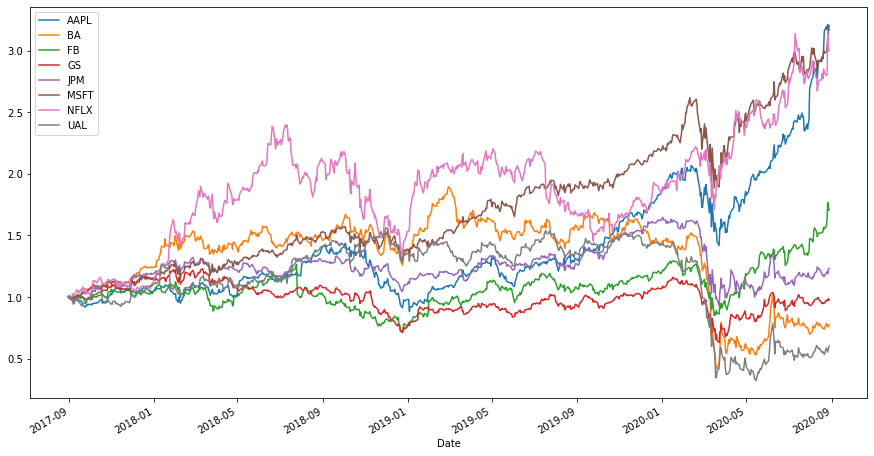

In [36]:
cum_daily_return.plot(figsize = (15,8))
plt.legend(loc = "upper left")

### The Analysis on Distribution of Returns

> Let's visualize daily % change values histogram for GS using 50 bins

In [37]:
daily_pct_change

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-08-31  0.000e+00  0.000  0.000e+00  0.000  0.000  0.000  0.000e+00  0.000
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
...               ...    ...        ...    ...    ...    ...        ...    ...
2020-08-25 -8.204e-03 -0.020  3.475e-02 -0.006  0.004  0.013  3.621e-03 -0.030
2020-08-26  1.360e-02 -0.016  8.222e-02  0.006 -0.014  0.022  1.161e-01 -0.028
2020-08-27 -1.195e-02  0.013 -3.517e-02  0.014  0.033  0.025 -3.883e-02  0.058
2020-08-28 -1.620e-03  0.009  1.501e-03 -0.012  0.004  0.010 -4.522e-03  0.031

[754 rows x 8 columns]

<AxesSubplot:>

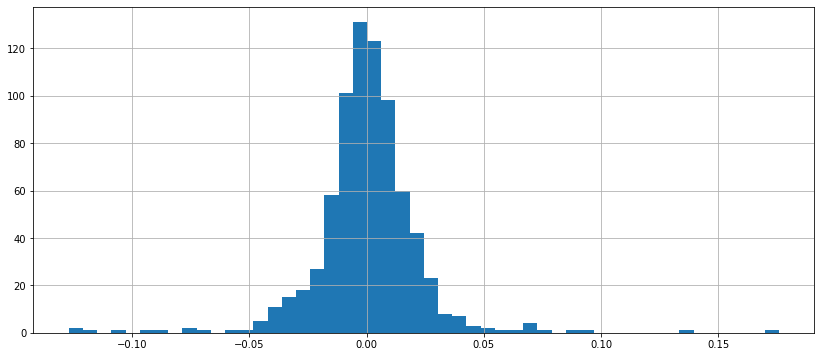

In [38]:
gs = daily_pct_change["GS"]
gs.hist(bins = 50, figsize = (14, 6))

> Let's see descriptive statistics

In [39]:
gs.describe()

count    7.540e+02
mean     2.151e-04
std      2.228e-02
min     -1.271e-01
25%     -8.652e-03
50%      1.414e-04
75%      9.861e-03
max      1.758e-01
Name: GS, dtype: float64

> You can reset the percentile.

In [40]:
gs.describe(percentiles = [0.025, 0.5, 0.975])

count    7.540e+02
mean     2.151e-04
std      2.228e-02
min     -1.271e-01
2.5%    -4.053e-02
50%      1.414e-04
97.5%    3.926e-02
max      1.758e-01
Name: GS, dtype: float64

> Let's visualize `all the cumulative return distributions`

array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'BA'}>,
        <AxesSubplot:title={'center':'FB'}>],
       [<AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'JPM'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'NFLX'}>,
        <AxesSubplot:title={'center':'UAL'}>, <AxesSubplot:>]],
      dtype=object)

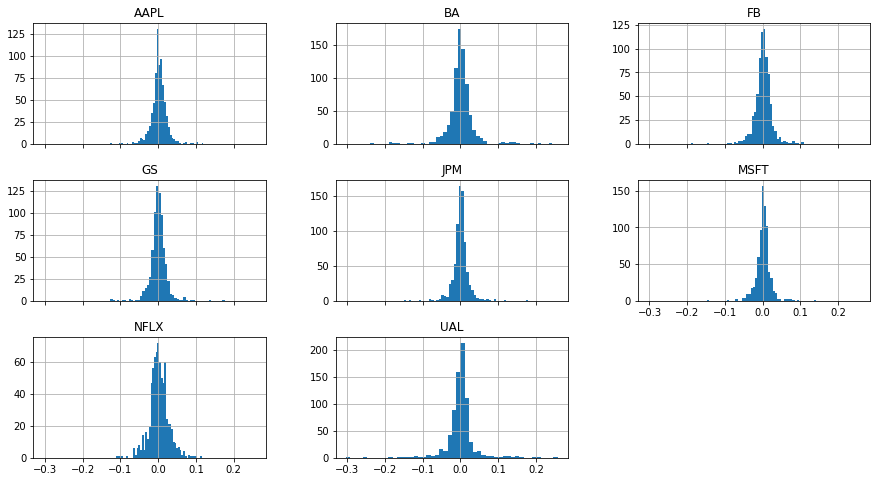

In [41]:
daily_pct_change.hist(bins = 50, sharex = True, figsize = (15, 8))

### QQ-Plots

> create a qq-plot of GS returns vs normal distribution

In [42]:
import scipy.stats as stats

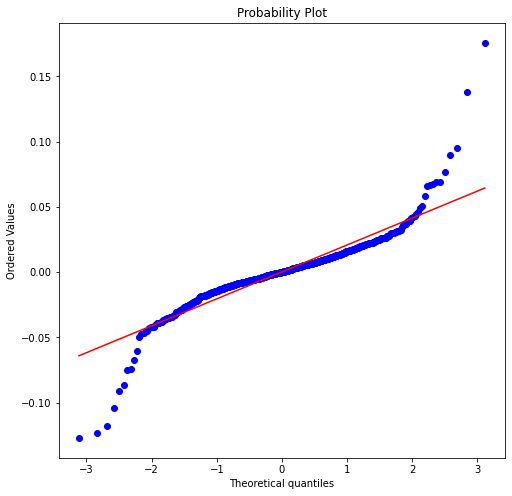

<Figure size 432x288 with 0 Axes>

In [43]:
f = plt.figure(figsize = (8, 8))
ax = f.add_subplot(111)
stats.probplot(gs, dist = "norm", plot = ax)
plt.show()
plt.savefig("QQ.png", dpi = 300)

### Box and whisker plots

> Let's visualize a boxplot for the GS returns

<AxesSubplot:>

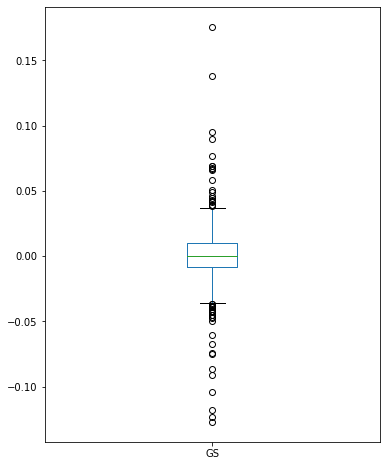

In [44]:
daily_pct_change[["GS"]].plot(kind = "box", figsize = (6,8))

> Now, let's examine `all the returns`.

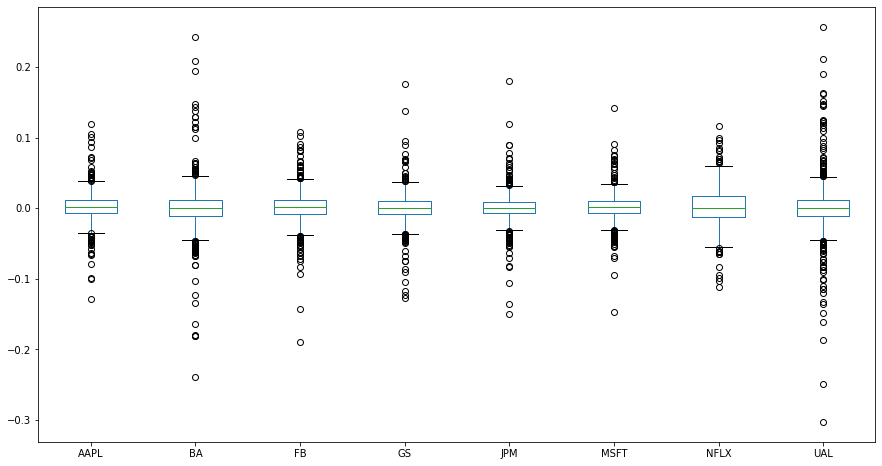

In [45]:
daily_pct_change.plot(kind = "box", figsize = (15, 8))
plt.savefig("box_stock8.png", dpi = 300)

### Comparison of `daily percentage change` ***between stocks***

In [46]:
def make_scatter_plot(data,
                      x_stock_name,
                      y_stock_name,
                      xlim = None,
                      ylim = None):
    
    fig = plt.figure(figsize = (10, 6))
    
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name], alpha = 0.2)
    
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.autoscale(False)
    
    ax.vlines(0, -10, 10, color = "grey")
    ax.hlines(0, -10, 10, color = "grey")
    
    ax.plot((-10, 10), (-10, 10), color = "red") # Perfect Correlation Benchmark :) for an Effective Comparison
    
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

##### Netflix vs. Boeing?

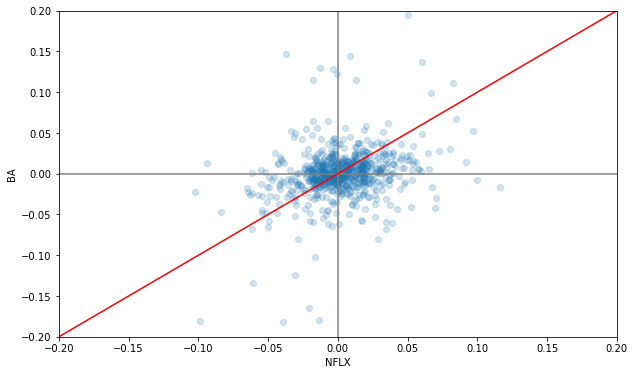

In [47]:
make_scatter_plot(daily_pct_change, "NFLX", "BA", xlim = (-0.20, 0.20), ylim = (-0.20, 0.20))

##### Goldman Sachs vs. JP Morgan Chase?

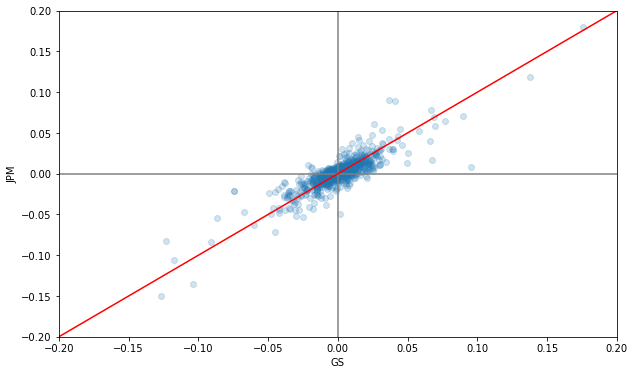

In [48]:
make_scatter_plot(daily_pct_change, "GS", "JPM", xlim = (-0.20, 0.20), ylim = (-0.20, 0.20))

### Let's look at all stocks against each other, with a Kernel Density Estimation (KDE) in the diagonal

`Kernels follow the conditions`:

$$ K(x) \geq 0, \int K(x) dx = 1, \int x K(x) dx = 0 $$


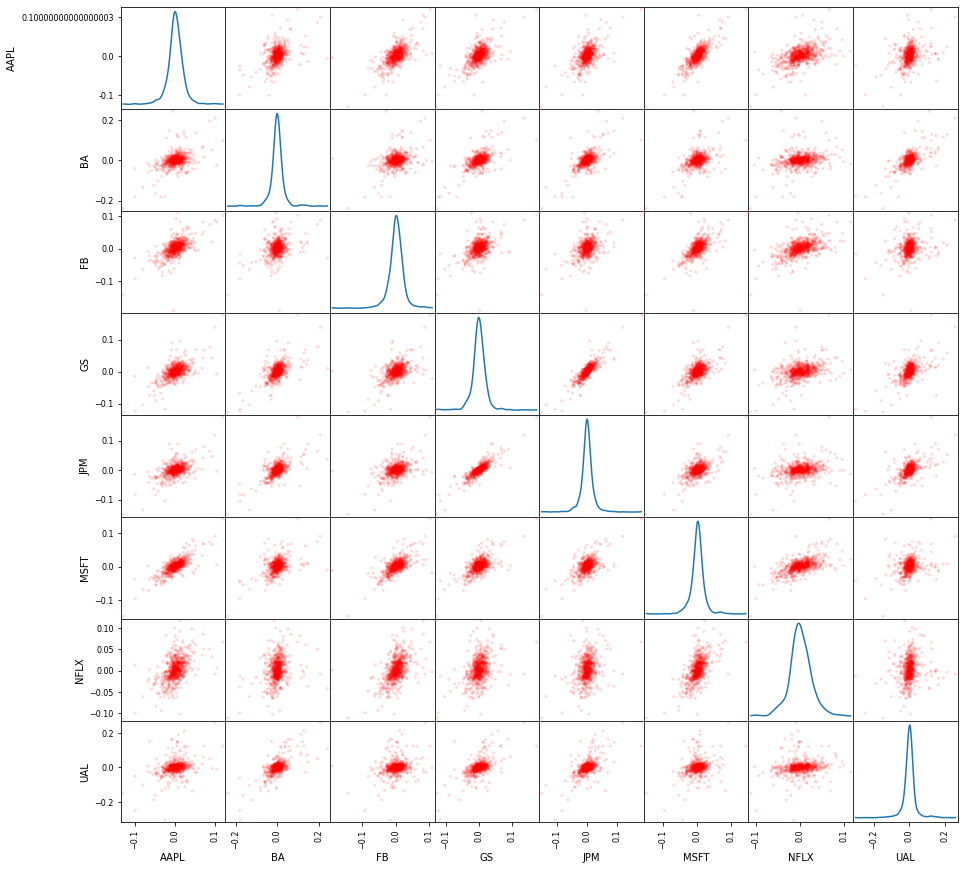

In [49]:
# pd.scatter_matrix() is deprecated :)
pd.plotting.scatter_matrix(daily_pct_change, diagonal = "kde", alpha = 0.15, figsize = (15,15), color = "red")
plt.savefig("scatter_kde.png", bbox_inches = "tight", dpi = 300)

### Moving Windows

In [50]:
daily_close_px

Ticker         AAPL       BA      FB       GS      JPM     MSFT    NFLX    UAL
Date                                                                          
2017-08-31   39.381  227.173  171.97  211.642   83.429   71.496  174.71  61.96
2017-09-01   39.393  227.808  172.02  213.666   84.172   70.702  174.74  62.43
2017-09-05   38.920  224.652  170.72  206.004   82.162   70.387  174.52  61.10
2017-09-06   38.880  222.396  172.09  206.998   82.713   70.186  179.25  60.33
...             ...      ...     ...      ...      ...      ...     ...    ...
2020-08-25  124.825  174.730  280.82  204.760  100.500  216.470  490.58  35.22
2020-08-26  126.522  171.900  303.91  205.973   99.090  221.150  547.53  34.25
2020-08-27  125.010  174.200  293.22  208.885  102.350  226.580  526.27  36.22
2020-08-28  124.808  175.800  293.66  206.460  102.770  228.910  523.89  37.34

[754 rows x 8 columns]

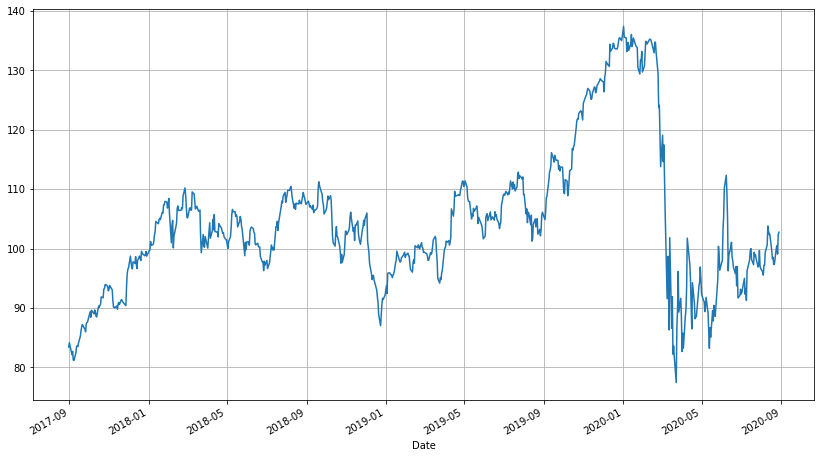

In [51]:
jpm = daily_close_px["JPM"]
jpm.plot(figsize = (14, 8))
plt.grid()

### Moving average: 

> One of the analyses you can first look at is moving averages (MA), which is commonly used to identify trading opportunities. 

> It is calculated by taking the mean or average of the past data points of the prices. 

> It is called a moving average, as opposed to just an average, because the data set is continuously “moving”: the oldest data points are dropped from the data set to account for the new data as they become available.

> The moving average graph is a smooth line that follows the day-to-day values of the prices we are tracking but it has some lags. 

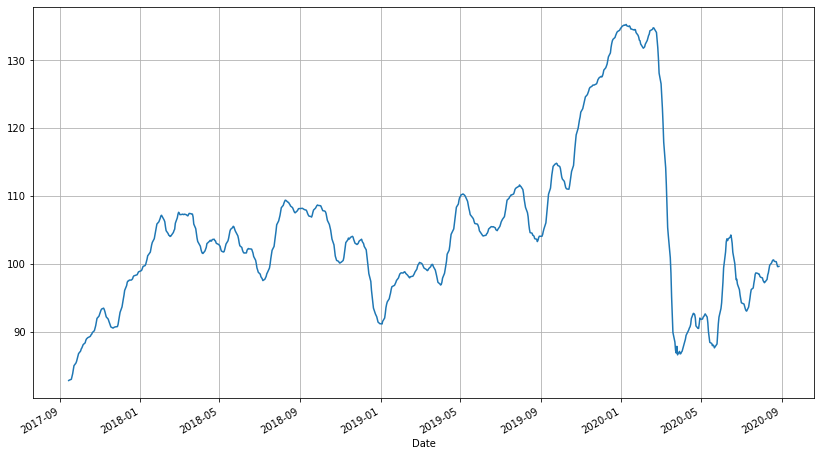

In [52]:
jpm.rolling(10).mean().plot(figsize = (14, 8))
plt.grid()

- Depending on the type of investor or trader (e.g., short-term vs. long-term; high risk vs. low risk trading), you may adjust your `moving time average` (10 days, 20 days, 50 days, 200 days, 1 year, 5 years, etc). 


- The two widely MAs that traders and investors used are 50-day MA and 200-day MA.

> Which moving average (50-day MA or 200-day MA) do you think will have a greater degree of lag?

##### Answer: Yes, 200-day MA in that it contains the prices for the past 200 days.

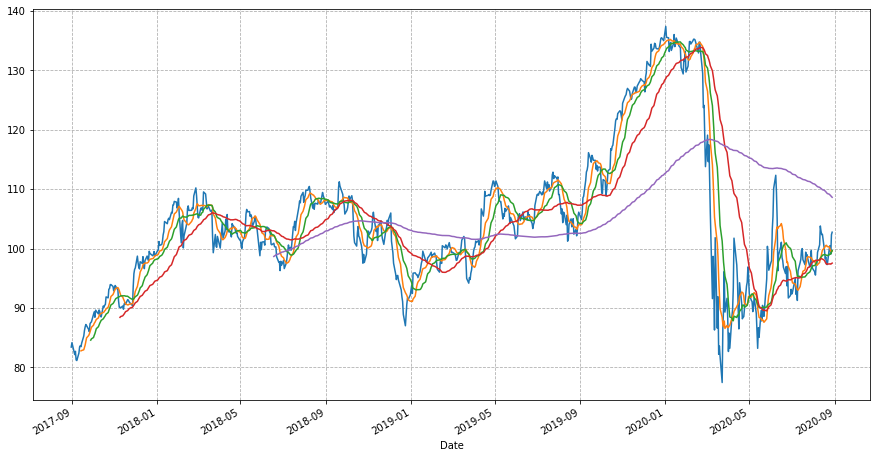

In [53]:
jpm.plot(figsize = (15, 8))
jpm.rolling(10).mean().plot(figsize = (15, 8))
jpm.rolling(20).mean().plot(figsize = (15, 8))
jpm.rolling(50).mean().plot(figsize = (15, 8))
jpm.rolling(200).mean().plot(figsize = (15, 8))
plt.grid(linestyle = "--")
plt.savefig("jpm_MAs.png", bbox_inches = "tight", dpi = 300)

<AxesSubplot:xlabel='Date'>

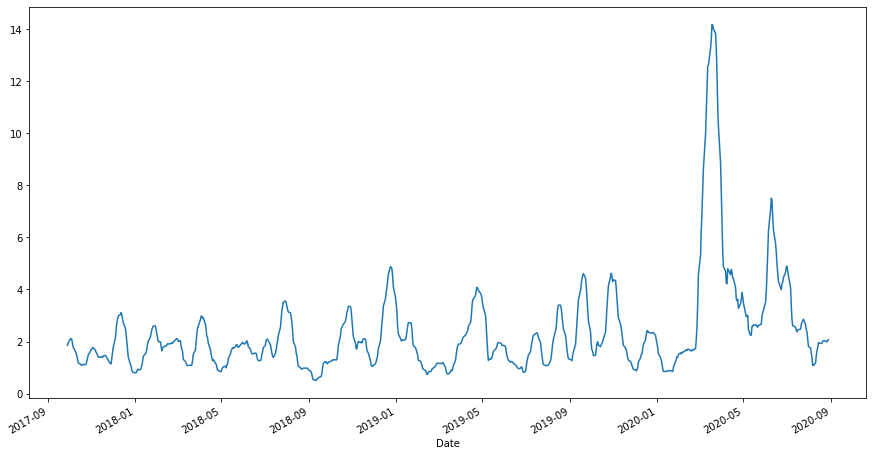

In [54]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()

jpm.rolling(20).apply(mean_abs_dev).plot(figsize = (15, 8))

In [55]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x), min_periods = 1)

<AxesSubplot:xlabel='Date'>

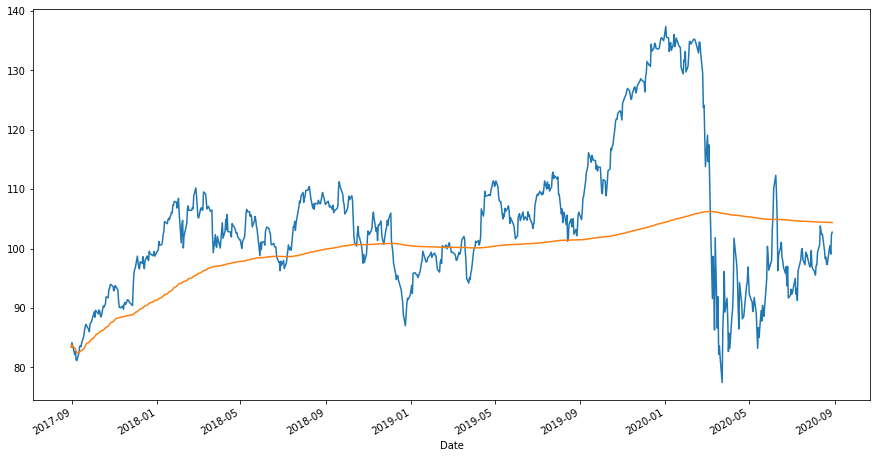

In [56]:
jpm.plot()
jpm.expanding().mean().plot(figsize = (15,8))

### Volatility Calculation

> Let's use a minimum of 80 days

In [57]:
min_periods = 80

> Let's calculate the rolling standard deviation

In [58]:
daily_pct_change

Ticker           AAPL     BA         FB     GS    JPM   MSFT       NFLX    UAL
Date                                                                          
2017-08-31  0.000e+00  0.000  0.000e+00  0.000  0.000  0.000  0.000e+00  0.000
2017-09-01  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011  1.717e-04  0.008
2017-09-05 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004 -1.259e-03 -0.021
2017-09-06 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003  2.710e-02 -0.013
...               ...    ...        ...    ...    ...    ...        ...    ...
2020-08-25 -8.204e-03 -0.020  3.475e-02 -0.006  0.004  0.013  3.621e-03 -0.030
2020-08-26  1.360e-02 -0.016  8.222e-02  0.006 -0.014  0.022  1.161e-01 -0.028
2020-08-27 -1.195e-02  0.013 -3.517e-02  0.014  0.033  0.025 -3.883e-02  0.058
2020-08-28 -1.620e-03  0.009  1.501e-03 -0.012  0.004  0.010 -4.522e-03  0.031

[754 rows x 8 columns]

In [59]:
vol = daily_pct_change.rolling(80).std() * np.sqrt(80)

> Let's visualize it

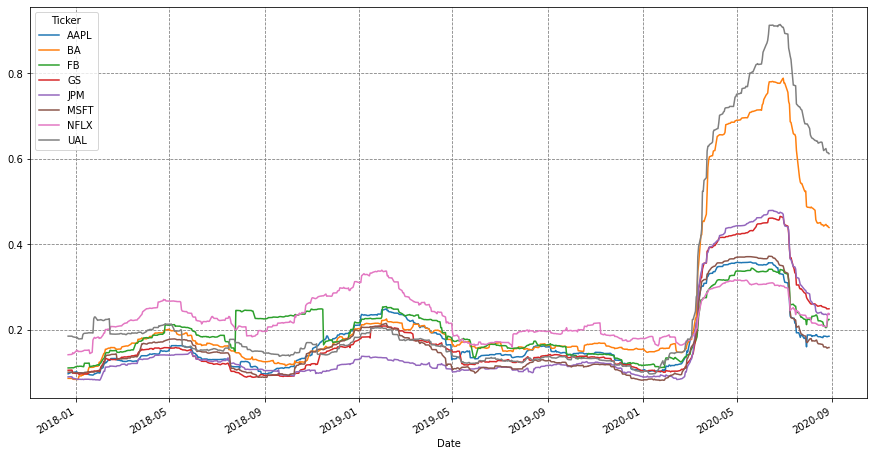

In [60]:
vol.plot(figsize = (15, 8))
plt.grid(color = "grey", linestyle = "--")

## Rolling correlation of returns

> Rolling correlation of Boeing and United Airlines

In [61]:
roll_corr = daily_close_px["BA"].rolling(20).corr(daily_close_px["UAL"]).dropna()
roll_corr

Date
2017-09-28   -0.432
2017-09-29   -0.349
2017-10-02   -0.257
2017-10-03   -0.031
              ...  
2020-08-25    0.956
2020-08-26    0.953
2020-08-27    0.940
2020-08-28    0.915
Length: 735, dtype: float64

> Let's visualize the rolling correlation

<AxesSubplot:xlabel='Date'>

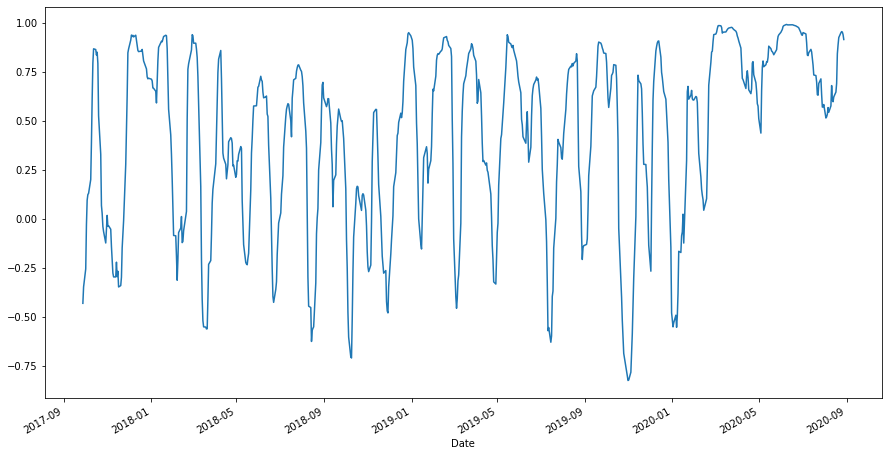

In [62]:
roll_corr.plot(figsize = (15, 8))

## Least squares regression of returns (beta)

> Let's regress the returns of GS onto JPM, using `Ordinary least squares` method.

In [63]:
import statsmodels.api as sm

In [64]:
# pd.ols() is deprecated...

x = sm.add_constant(daily_pct_change["GS"])
model = sm.OLS(daily_pct_change["JPM"], x).fit()

print(model.params)
print(model.rsquared)
print(str(model.summary()))

const    3.257e-04
GS       8.313e-01
dtype: float64
0.7526207759617265
                            OLS Regression Results                            
Dep. Variable:                    JPM   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     2288.
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          2.69e-230
Time:                        23:50:14   Log-Likelihood:                 2357.5
No. Observations:                 754   AIC:                            -4711.
Df Residuals:                     752   BIC:                            -4702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [65]:
for attr in dir(model):
    if not attr.startswith("_"):
        print(attr)

HC0_se
HC1_se
HC2_se
HC3_se
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summary2
t_test
t_test_pairwise
tvalues
uncentered_tss
use_t
wald_test
wald_test_terms
wresid


# Comparing stocks to the S&P 500

> Let's calculate the percentage change on the close for S&P 500

In [79]:
sp500 = web.DataReader("^GSPC", "yahoo", start, end)

In [80]:
sp500_dpc = sp500["Adj Close"].pct_change().fillna(0)
sp500_dpc.head()

Date
2017-08-31    0.000e+00
2017-09-01    1.983e-03
2017-09-05   -7.551e-03
2017-09-06    3.129e-03
2017-09-07   -1.784e-04
Name: Adj Close, dtype: float64

> Then, let's concat the S&P data with the other daily pct values

In [83]:
dpc_all = pd.concat([sp500_dpc, daily_pct_change], axis = 1)
dpc_all.head()

In [85]:
dpc_all.rename(columns = {"Adj Close": "SP500"}, inplace = True)
dpc_all.head()

                SP500       AAPL     BA         FB     GS    JPM   MSFT  \
Date                                                                      
2017-08-31  0.000e+00  0.000e+00  0.000  0.000e+00  0.000  0.000  0.000   
2017-09-01  1.983e-03  3.050e-04  0.003  2.908e-04  0.010  0.009 -0.011   
2017-09-05 -7.551e-03 -1.201e-02 -0.014 -7.557e-03 -0.036 -0.024 -0.004   
2017-09-06  3.129e-03 -1.049e-03 -0.010  8.025e-03  0.005  0.007 -0.003   
2017-09-07 -1.784e-04 -4.015e-03  0.007  6.508e-03 -0.014 -0.018  0.013   

                 NFLX    UAL  
Date                          
2017-08-31  0.000e+00  0.000  
2017-09-01  1.717e-04  0.008  
2017-09-05 -1.259e-03 -0.021  
2017-09-06  2.710e-02 -0.013  
2017-09-07 -1.395e-03 -0.029  

> Let's calculate the cumulative, from all the daily.

In [86]:
cdr_all = (1 + dpc_all).cumprod()
cdr_all.head()

            SP500   AAPL     BA     FB     GS    JPM   MSFT   NFLX    UAL
Date                                                                     
2017-08-31  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
2017-09-01  1.002  1.000  1.003  1.000  1.010  1.009  0.989  1.000  1.008
2017-09-05  0.994  0.988  0.989  0.993  0.973  0.985  0.984  0.999  0.986
2017-09-06  0.998  0.987  0.979  1.001  0.978  0.991  0.982  1.026  0.974
2017-09-07  0.997  0.983  0.986  1.007  0.965  0.974  0.994  1.025  0.945

> Let's calculate the correlations

In [88]:
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500   AAPL     BA     FB     GS    JPM   MSFT   NFLX    UAL
SP500  1.000  0.797  0.658  0.651  0.818  0.821  0.861  0.518  0.520
AAPL   0.797  1.000  0.461  0.616  0.614  0.560  0.764  0.498  0.349
BA     0.658  0.461  1.000  0.354  0.614  0.644  0.475  0.264  0.672
FB     0.651  0.616  0.354  1.000  0.491  0.447  0.649  0.511  0.265
GS     0.818  0.614  0.614  0.491  1.000  0.868  0.638  0.380  0.592
JPM    0.821  0.560  0.644  0.447  0.868  1.000  0.602  0.300  0.597
MSFT   0.861  0.764  0.475  0.649  0.638  0.602  1.000  0.587  0.321
NFLX   0.518  0.498  0.264  0.511  0.380  0.300  0.587  1.000  0.161
UAL    0.520  0.349  0.672  0.265  0.592  0.597  0.321  0.161  1.000

> Let's see how well did each stock relate to the S&P 500

In [89]:
dpc_corrs.loc["SP500"]

SP500    1.000
AAPL     0.797
BA       0.658
FB       0.651
GS       0.818
JPM      0.821
MSFT     0.861
NFLX     0.518
UAL      0.520
Name: SP500, dtype: float64

> Let's plot `Netflix` and `Goldman Sachs` against `S&P500`

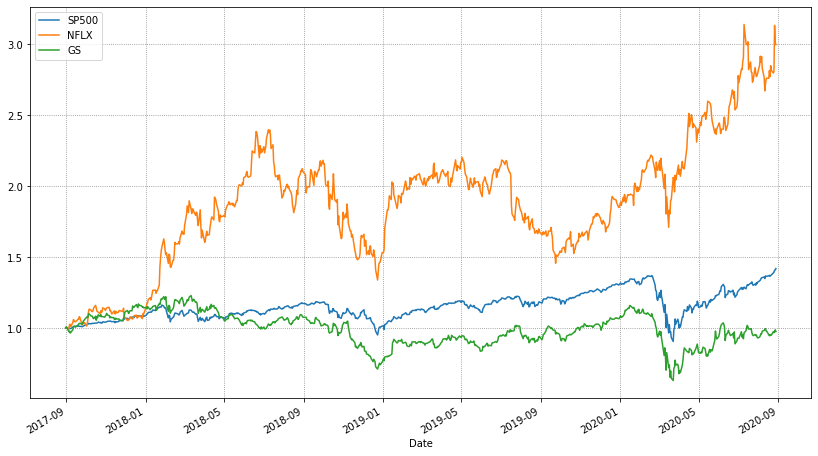

In [90]:
cdr_all[["SP500", "NFLX", "GS"]].plot(figsize=(14,8))
plt.grid(color = "grey", linestyle = "dotted")
plt.savefig("SP500_AAPL_BA.png", bbox_inches='tight', dpi=300)

> Goldman Sachs vs S&P 500

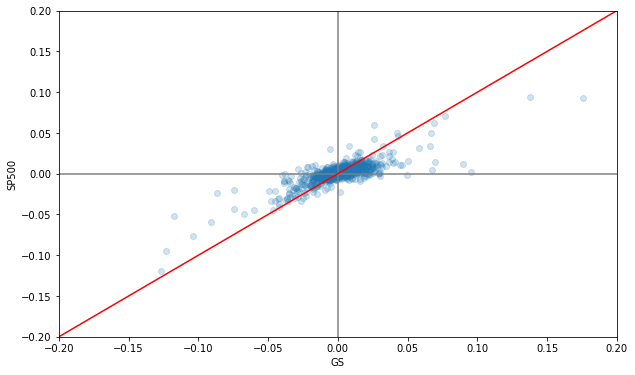

In [95]:
make_scatter_plot(dpc_all, "GS", "SP500", xlim = (-0.20, 0.20), ylim = (-0.20, 0.20))
plt.savefig('AAPL_SP500.png', dpi = 300)

In [93]:
import seaborn as sns

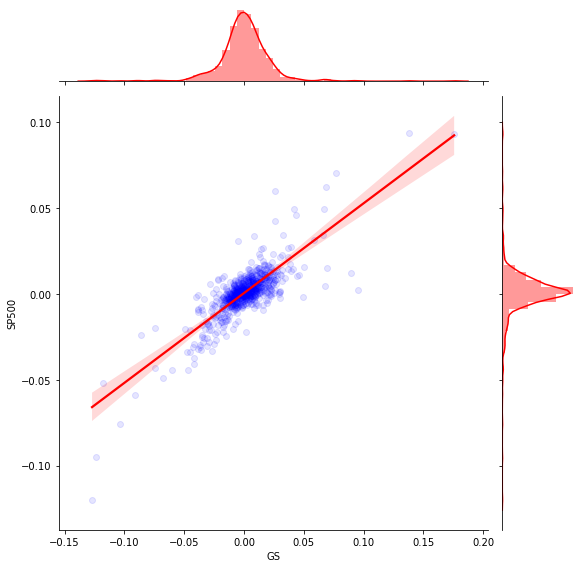

In [99]:
sns.jointplot(x="GS", y="SP500", data=dpc_all, kind = "reg", color = "red",
              scatter_kws={"alpha":0.10, "color": "blue"}, line_kws={"color": "red"},
              height = 8)

> Netflix vs S&P 500

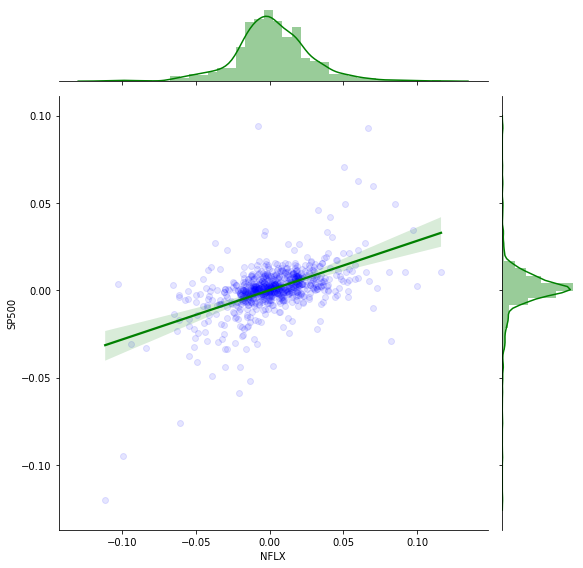

In [101]:
sns.jointplot(x="NFLX", y="SP500", data=dpc_all, kind = "reg", color = "green",
              scatter_kws={"alpha":0.10, "color": "blue"}, line_kws={"color": "green"},
             height = 8)

> `Thank you for working with the script :)`

In [ ]:
exit()